# Breadth First Search

In [43]:
import matplotlib.pyplot as plt
from collections import deque
import copy

### Input matrix, 1 means blocked 0 is passable.

In [44]:
nodes = [
  [0, 0, 0, 0, 0, 0],
  [1, 0, 1, 1, 1, 0],
  [0, 0, 0, 0, 0, 0],
  [0, 1, 1, 0, 1, 1],
  [0, 1, 1, 0, 1, 1],
  [0, 0, 0, 0, 0, 0],
]

### Node auxiliary class

In [45]:
class Node(object):
  def __init__(self, col, row, val, changes_left=0):
    self.col = col
    self.row = row
    self.val = val
    self.coord = (self.row, self.col)
    self.changes_left = changes_left
    self.path = None

  def __eq__(self, other):
    return self.coord == other.coord
    
  def __repr__(self):
    return "(%s, %s, %s)" % (self.row, self.col, self.val)

  def get_path(self):
    current = self
    out = [current]
    while current:
      current = current.path
      if current:
        out.append(current)
    return out

### Matrix auxiliary class

In [46]:
class Matrix(object):
  def __init__(self, matrix):
    self.matrix = matrix
    self.row = len(matrix)
    self.col = len(matrix[0])
    self.nodes = {}
    self.gen_nodes()

  def plot_matrix(self, save=False, name=None):
    plt.imshow(self.matrix)
    plt.colorbar()
    plt.show()
    if save:
      plt.imsave("%s.png" % name or id(self), self.matrix)

  def __getitem__(self, coord):
    return self.nodes.get(coord, None)

  def __setitem__(self, coord, node):
    self.nodes[coord] = node
    self.matrix[node.row][node.col] = node.val

  def gen_nodes(self):
    for row_idx, row in enumerate(self.matrix):
      for col_idx, val in enumerate(row):
        node = Node(col=col_idx, row=row_idx, val=val)
        self.nodes[node.coord] = node
    
  def get_neighbors(self, node):
    out = []
    for row in [-1, 1]:
      coord = (node.row + row, node.col)
      n = self[coord]
      if n:
        out.append(n)
            
    for col in [-1, 1]:
      coord = (node.row, node.col + col)
      n = self.nodes.get(coord, None)
      if n:
        out.append(n)
    return out

### Breadth First Search method

In [47]:
def BFS(matrix, root, goal):
  queue = deque([root])
  seen = set([root.coord])
  while queue:
    v = queue.popleft()
    if v == goal:
      return v
    for n in matrix.get_neighbors(v):
      if n.val == 1:
        continue
      if n.coord not in seen:
        seen.add(n.coord)
        queue.append(n)
        n.path = v
  return None

### Running the code

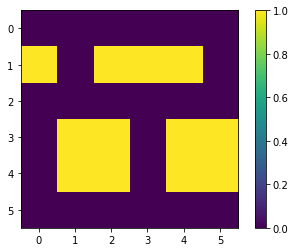

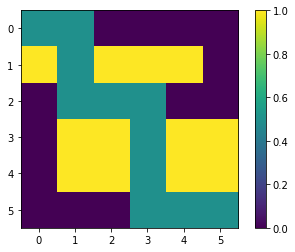

In [48]:
matrix = Matrix(nodes)
matrix.plot_matrix(save=True, name="before")

v = BFS(matrix, matrix[(0, 0)] , matrix[(matrix.row - 1, matrix.col - 1)])
path = v.get_path()

final_matrix = copy.deepcopy(matrix)
for node in path:
  copy_node = copy.deepcopy(node)
  copy_node.val = 0.5
  final_matrix[node.coord] = copy_node

final_matrix.plot_matrix(save=True, name="after")


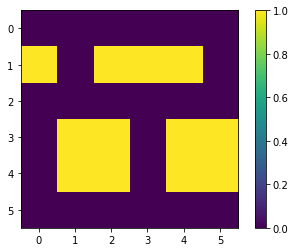

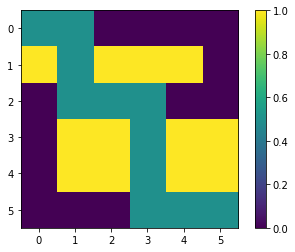

In [23]:
matrix = Matrix(nodes)
matrix.plot_matrix(save=True)

v = BFS(matrix, matrix[(0, 0)] , matrix[(matrix.row - 1, matrix.col - 1)])
path = v.get_path()

final_matrix = copy.deepcopy(matrix)
for node in path:
  copy_node = copy.deepcopy(node)
  copy_node.val = 0.5
  final_matrix[node.coord] = copy_node

final_matrix.plot_matrix(save=True)
